<a href="https://colab.research.google.com/github/FernandoRodriguesDeSantana/ML_py/blob/main/first_ml_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**My First ML Project**

##**Load Data**

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

##**Data preparation**

###Data separation as X and Y

In [ ]:
y = df['logS']
y

In [ ]:
X = df.drop('logS', axis=1)
X

###Data splitting

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train

In [ ]:
X_test

##**Model Building**

###Linear Regression

*Training the model*

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

*Applying the model to make a prediction*

In [19]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
print(y_lr_train_pred, y_lr_test_pred)

In [ ]:
y_lr_train_pred

In [ ]:
y_lr_test_pred

*Evaluate model performance*

In [ ]:
y_train

In [ ]:
y_lr_train_pred

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print(lr_train_mse)
print(lr_train_r2)
print(lr_test_mse)
print(lr_test_r2)

In [32]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

### Training the model

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make a prediction

In [35]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### Evaluate model performance

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [42]:
rf_results = pd.DataFrame(['Linear Regression', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.028228,0.759669,1.407688,0.709223


## **Model comparison**

In [46]:
df_models = pd.concat([lr_results, rf_results], axis = 0).reset_index(drop = True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Linear Regression,1.028228,0.759669,1.407688,0.709223


# **Data visualization of prediction results**

Text(0.5, 0, 'Experimental LogS')

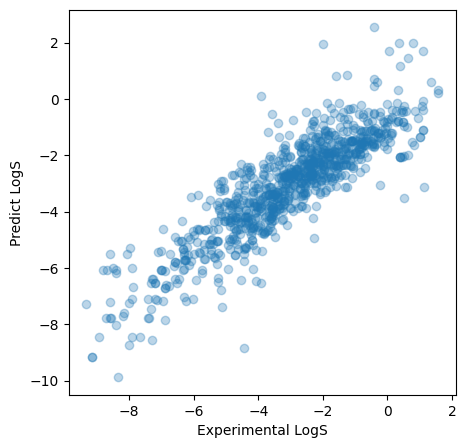

In [55]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x = y_train, y = y_lr_train_pred, alpha = 0.3)

plt.plot()
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')